In [17]:
# Data from https://www.kaggle.com/uciml/indian-liver-patient-records

import pandas as pd
import seaborn as sns

livers = pd.read_csv('indian_liver_patient.csv')
livers.shape

(583, 11)

In [18]:
# Relabelling

# 1 is positive, 2 is negative
livers = livers.rename(columns={"Dataset": "disease"})
livers['disease'] = livers['disease'].map({1: 1, 2: 0})

# Tokenising the binary genders 
livers['Gender'] = livers['Gender'].map({'Female': 0, 'Male': 1})
livers

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [19]:
livers = livers.dropna()
livers

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


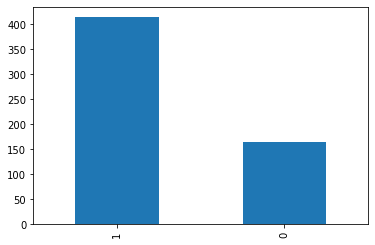

In [21]:
# Could be better split but not horrible 
livers['disease'].value_counts().plot.bar()

In [22]:
y = livers['disease']
X = livers.drop(columns='disease')

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [98]:
from sklearn.linear_model import (LogisticRegression, SGDClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import (KNeighborsClassifier, NearestCentroid)
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.gaussian_process import GaussianProcessClassifier

In [120]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
auc_score = metrics.roc_auc_score(y_test, predicted)
auc_score

0.5793558682721601

RandomForestClassifier returned a roc_auc_score of 0.7661395618743654
GradientBoostingClassifier returned a roc_auc_score of 0.6943275787030321
LogisticRegression returned a roc_auc_score of 0.786159872334252
SVC returned a roc_auc_score of 0.5522268968518786
KNeighborsClassifier returned a roc_auc_score of 0.6491368054548092
GaussianProcessClassifier returned a roc_auc_score of 0.5655012331350646


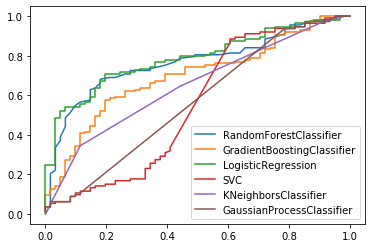

In [125]:
from sklearn import metrics

models = {'RandomForestClassifier': RandomForestClassifier(n_estimators=100),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(probability=True),
          #'SGDClassifier': SGDClassifier(),
          'KNeighborsClassifier': KNeighborsClassifier(),
          #'NearestCentroid': NearestCentroid(),
          'GaussianProcessClassifier': GaussianProcessClassifier()
         }
          
for i in models.keys():
    classifier = models[i]
    classifier.fit(X_train, y_train)
    predicted = classifier.predict_proba(X_test)[:, 1]
    auc_score = metrics.roc_auc_score(y_test, predicted)
    xax, yax, _ = metrics.roc_curve(y_test, predicted)
    plt.plot(xax, yax)
    
    print(f'{i} returned a roc_auc_score of {auc_score}')

plt.legend(models.keys())
plt.show()